In [ ]:
#linear algebra,data preprocessing,Csv files
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn import preprocessing
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#for data cleaning
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

#for feature selection
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#evalution metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#for classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

#model selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


#for clustering 
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [ ]:
df = pd.read_csv('events.csv')



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,DATEADDED,EventRootCode,SOURCEURL,title,text,image,author,metadata,tags
0,2015-08-19,4,http://www.thespec.com/news-story/5805615--12-...,0,0,0,0,0,0
1,2015-08-19,8,http://www.japantoday.com/category/business/vi...,0,0,0,0,0,0
2,2015-08-19,8,https://au.news.yahoo.com/thewest/business/wor...,Australia seeks to become the delicatessen of ...,By Colin Packham\n\nSYDNEY (Reuters) - Austral...,https://s.yimg.com/cv/apiv2/social/images/yaho...,[],"defaultdict(<class 'dict'>, {'oath': {'guce': ...",set()
3,2015-08-19,1,http://www.peoplesdailyng.com/aepbs-bid-to-pro...,0,0,0,0,0,0
4,2015-08-19,1,http://www.nola.com/crime/index.ssf/2015/08/or...,New Orleans jury deadlocks in Treme killing tr...,"Seabon Gibson main.jpg\n\nSeabon ""Tom"" Gibson,...",https://bloximages.newyork1.vip.townnews.com/n...,"['Paul Purpura', 'Nola.Com', 'The Times-Picayu...","defaultdict(<class 'dict'>, {'keywords': 'crim...",set()


In [ ]:
# df = df.iloc[[0,10000],:]

In [ ]:
df.shape

(718614, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718614 entries, 0 to 718613
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   DATEADDED      718614 non-null  object
 1   EventRootCode  718614 non-null  object
 2   SOURCEURL      718614 non-null  object
 3   title          718600 non-null  object
 4   text           718596 non-null  object
 5   image          718596 non-null  object
 6   author         718614 non-null  object
 7   metadata       718614 non-null  object
 8   tags           718614 non-null  object
dtypes: object(9)
memory usage: 49.3+ MB


In [ ]:
df['EventRootCode'].unique()

array([4, 8, 1, 19, 17, 2, 10, 11, 3, 5, 18, 6, 9, 13, 14, 7, 12, 16, 15,
       20, '12', '03', '08', '02', '05', '04', '01', '09', '07', '11',
       '17', '18', '19', '13', '06', '14', '16', '10', '15', '20', '--'],
      dtype=object)

In [ ]:
indexNames = df[ (df['EventRootCode'] == '--') ].index
df.drop(indexNames ,axis=0, inplace=True)
df.shape

(718613, 9)

In [ ]:
df['EventRootCode'] = df['EventRootCode'].astype(int)
len(df['EventRootCode'].unique())

20

In [ ]:
# events['year'] = events["DATEADDED"].apply(lambda X : str(X)[:4])
df.DATEADDED = pd.to_datetime(df.DATEADDED)
df["year"]= df.DATEADDED.dt.year
df['year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


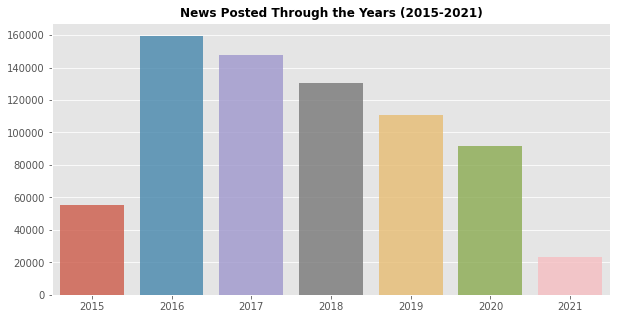

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
year  = df['year'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(year.index, year.values, alpha=0.8)
plt.title("News Posted Through the Years (2015-2021)",
          fontweight="bold", size=12);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


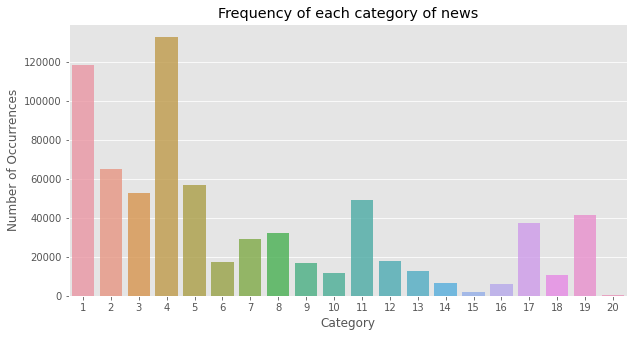

In [ ]:
plt.style.use('ggplot')
EventRootCode  = df['EventRootCode'].value_counts().sort_values()
plt.figure(figsize=(10,5))
sns.barplot(EventRootCode.index, EventRootCode.values, alpha=0.8)
plt.title('Frequency of each category of news')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

In [ ]:
df['SOURCEURL'].duplicated().sum()



0

In [ ]:
df.head()

,DATEADDED,EventRootCode,SOURCEURL,title,text,image,author,metadata,tags,year
0,2015-08-19,4,http://www.thespec.com/news-story/5805615--12-...,0,0,0,0,0,0,2015
1,2015-08-19,8,http://www.japantoday.com/category/business/vi...,0,0,0,0,0,0,2015
2,2015-08-19,8,https://au.news.yahoo.com/thewest/business/wor...,Australia seeks to become the delicatessen of ...,By Colin Packham\n\nSYDNEY (Reuters) - Austral...,https://s.yimg.com/cv/apiv2/social/images/yaho...,[],"defaultdict(<class 'dict'>, {'oath': {'guce': ...",set(),2015
3,2015-08-19,1,http://www.peoplesdailyng.com/aepbs-bid-to-pro...,0,0,0,0,0,0,2015
4,2015-08-19,1,http://www.nola.com/crime/index.ssf/2015/08/or...,New Orleans jury deadlocks in Treme killing tr...,"Seabon Gibson main.jpg\n\nSeabon ""Tom"" Gibson,...",https://bloximages.newyork1.vip.townnews.com/n...,"['Paul Purpura', 'Nola.Com', 'The Times-Picayu...","defaultdict(<class 'dict'>, {'keywords': 'crim...",set(),2015


In [ ]:
df.shape

(718613, 10)

In [ ]:
indexNames = df[ (df['title'] == '0') & (df['text'] == '0') ].index

len(indexNames)



64923

In [ ]:
df1 = df.drop(indexNames ,axis=0)
df1.shape

(653690, 10)

In [ ]:
df1['description'] = df1['title'].astype(str)+" "+df1['text'].astype(str)
df1.head()

,DATEADDED,EventRootCode,SOURCEURL,title,text,image,author,metadata,tags,year,description
2,2015-08-19,8,https://au.news.yahoo.com/thewest/business/wor...,Australia seeks to become the delicatessen of ...,By Colin Packham\n\nSYDNEY (Reuters) - Austral...,https://s.yimg.com/cv/apiv2/social/images/yaho...,[],"defaultdict(<class 'dict'>, {'oath': {'guce': ...",set(),2015,Australia seeks to become the delicatessen of ...
4,2015-08-19,1,http://www.nola.com/crime/index.ssf/2015/08/or...,New Orleans jury deadlocks in Treme killing tr...,"Seabon Gibson main.jpg\n\nSeabon ""Tom"" Gibson,...",https://bloximages.newyork1.vip.townnews.com/n...,"['Paul Purpura', 'Nola.Com', 'The Times-Picayu...","defaultdict(<class 'dict'>, {'keywords': 'crim...",set(),2015,New Orleans jury deadlocks in Treme killing tr...
5,2015-08-19,19,http://deadline.com/2015/08/clive-owen-valeria...,Clive Owen Set By Luc Besson For ‘Valerian’,EXCLUSIVE: Luc Besson has set Clive Owen to st...,https://deadline.com/wp-content/uploads/2015/0...,['Mike Fleming Jr'],"defaultdict(<class 'dict'>, {'viewport': 'widt...","{'Clive Owen', 'Europacorp', 'Specialty B.O.',...",2015,Clive Owen Set By Luc Besson For ‘Valerian’ EX...
7,2015-08-19,19,http://www.latimes.com/local/lanow/la-me-ln-la...,L.A.'s voided law against sleeping in cars cos...,The city of Los Angeles agreed Wednesday to pa...,https://ca-times.brightspotcdn.com/dims4/defau...,"['Staff Writer', 'Gale Holland Is A Staff Writ...","defaultdict(<class 'dict'>, {'og': {'title': ""...","{'Coronavirus, Vaccines and Pandemic', 'Latest...",2015,L.A.'s voided law against sleeping in cars cos...
8,2015-08-19,4,http://www.telegram.com/article/20150819/NEWS/...,Retired Worcester priest faces money launderin...,WORCESTER - A retired Roman Catholic priest ha...,https://www.telegram.com/Global/images/head/na...,"['Brian Lee', 'Brian Lee Telegram', 'Gazette S...","defaultdict(<class 'dict'>, {'viewport': 'widt...",set(),2015,Retired Worcester priest faces money launderin...


In [ ]:
df1.duplicated(subset=['description']).sum()

653092

In [ ]:
df1.drop_duplicates(subset=['description'],keep='last',inplace=True)

In [ ]:
df1.shape

(598, 11)

In [ ]:
erc = df1['EventRootCode'].unique()


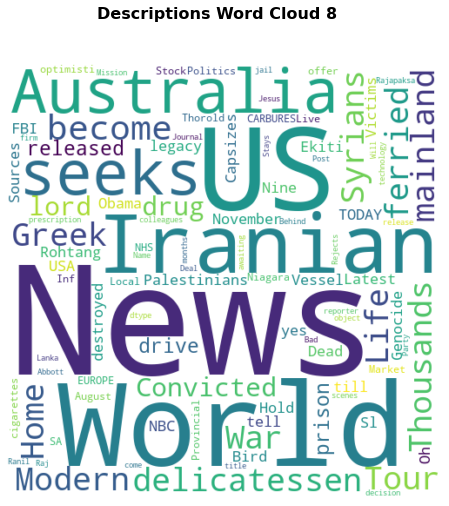

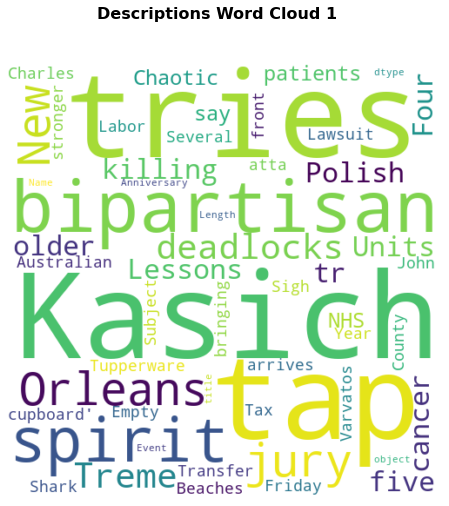

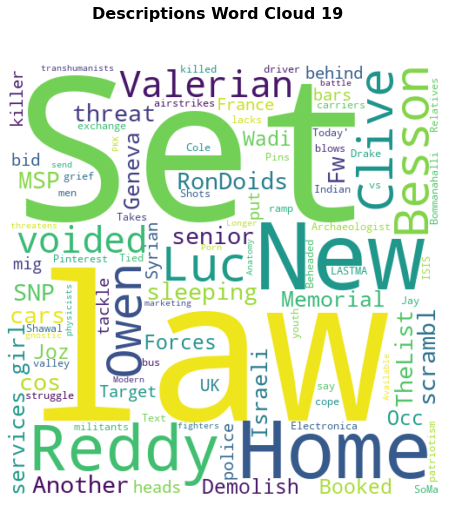

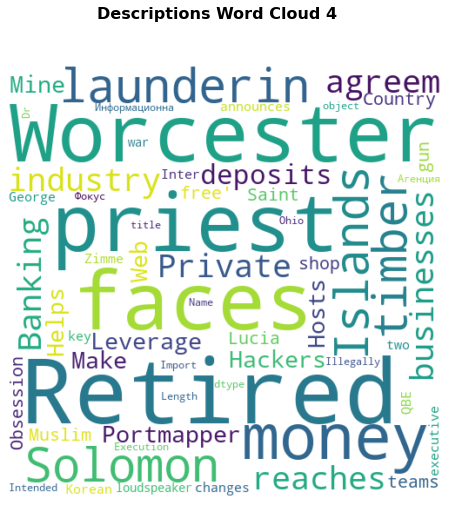

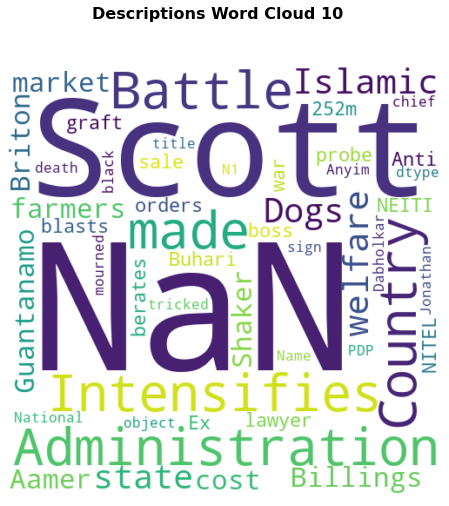

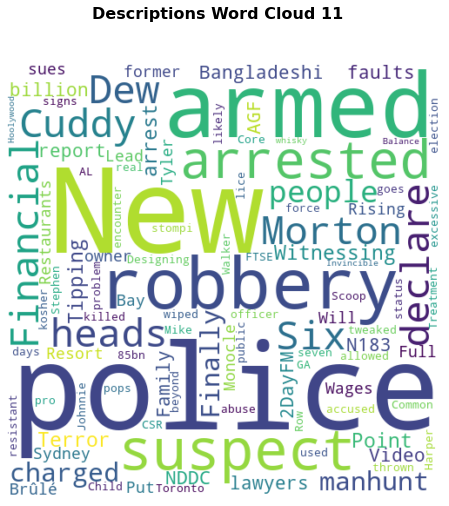

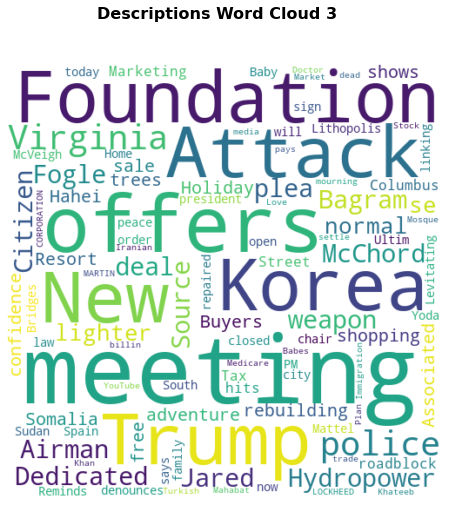

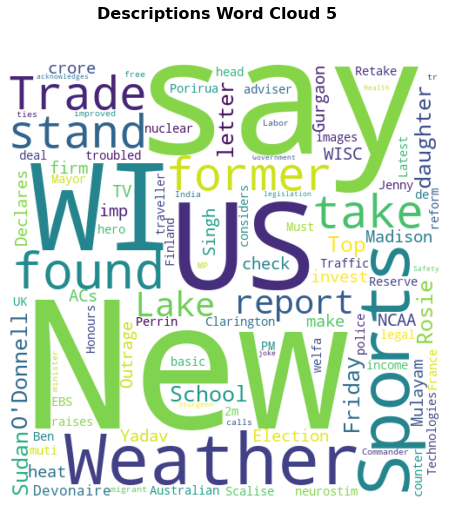

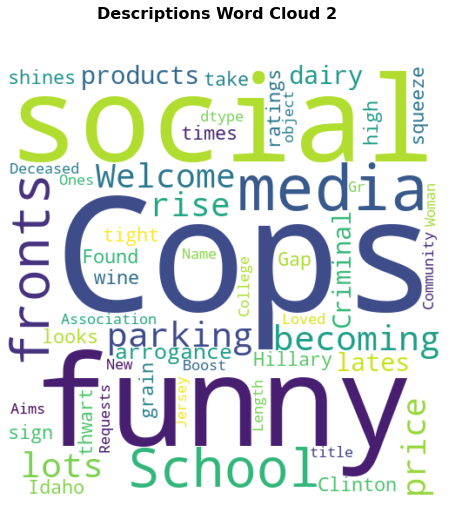

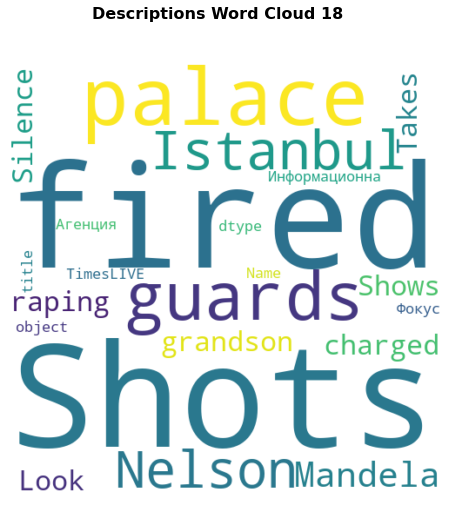

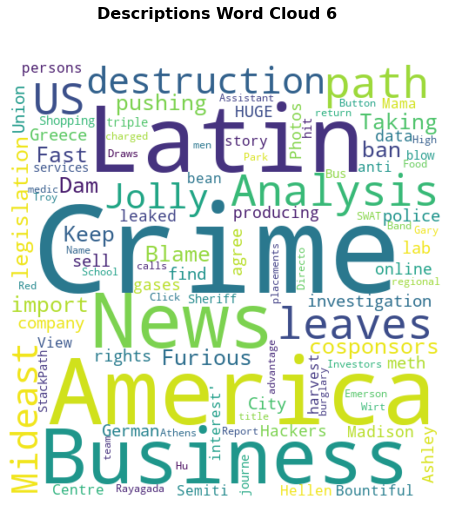

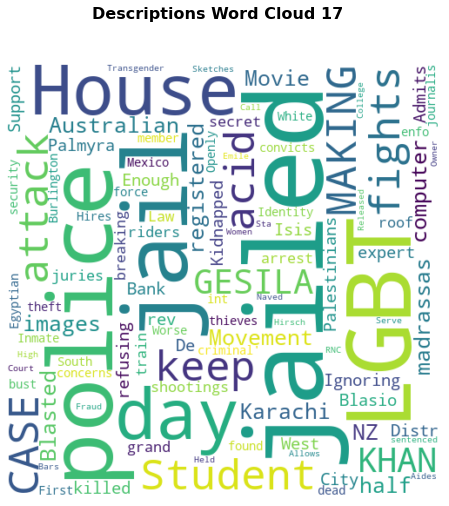

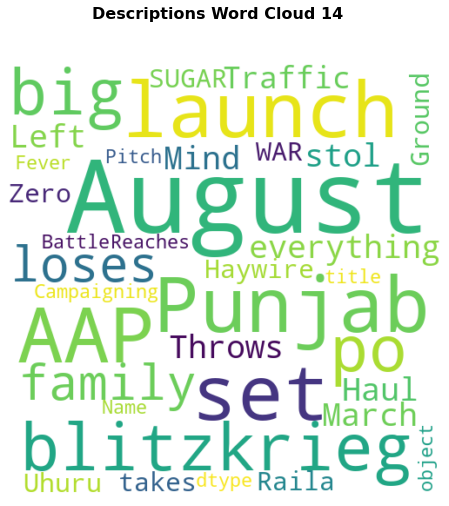

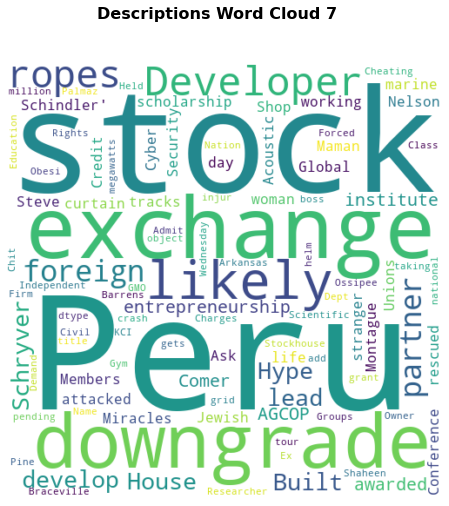

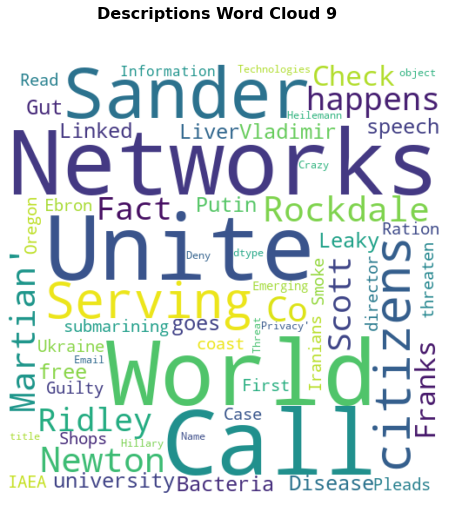

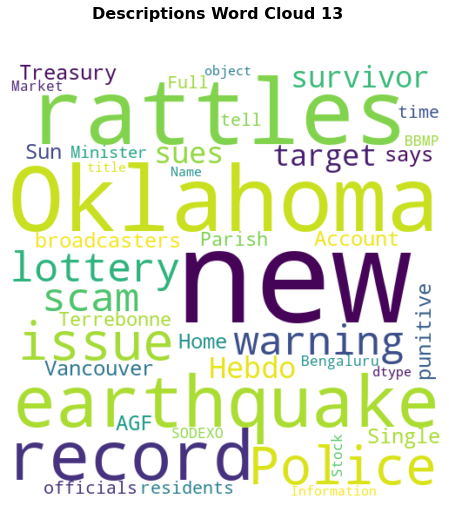

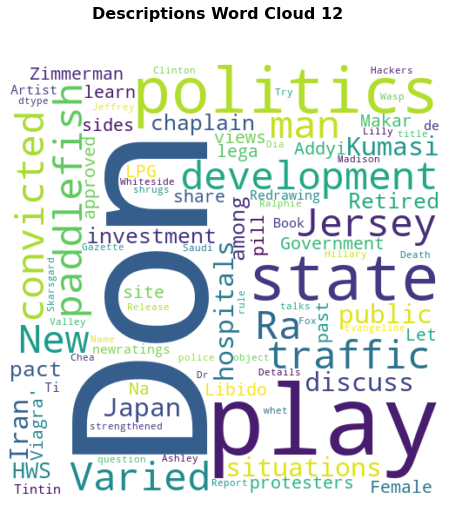

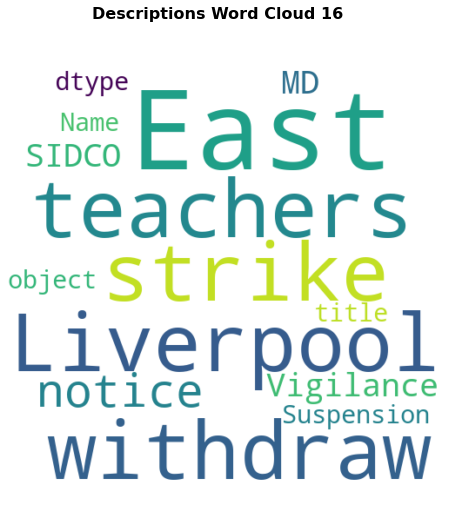

In [ ]:
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      width=500,
                      height=500
)
for x in erc:
  y = int(x)
  # wordcloud.generate(str(df1.query('EventRootCode == @y')['description']))
  wordcloud.generate(str(df1.query('EventRootCode == @y')['title']))
  plt.rcParams['figure.figsize'] = (8,8)
  plt.axis('off')
  plt.suptitle('Descriptions Word Cloud {}'.format(x), fontsize=16, fontweight='bold')
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.show()

In [ ]:
# do not use this code


# import string
# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS
# from spacy.lang.en import English

# # Create our list of punctuation marks
# punctuations = string.punctuation

# # Create our list of stopwords
# nlp = spacy.load('en')
# stop_words = spacy.lang.en.stop_words.STOP_WORDS

# # Load English tokenizer, tagger, parser, NER and word vectors
# parser = English()

# # Creating our tokenizer function
# def spacy_tokenizer(sentence):
#     # Creating our token object, which is used to create documents with linguistic annotations.
#     mytokens = parser(sentence)

#     # # Lemmatizing each token and converting each token into lowercase
#     # mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

#     # # Removing stop words
#     # mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

#     # return preprocessed list of tokens
#     return mytokens


In [ ]:
#do not use this code


# data = ' '.join([text for text in df1['description']])

In [ ]:
desc_lst = []
for i in df1['text']:
  desc_lst.append(i)
desc_lst


In [ ]:
#removing punctuations


def remove_punc(text):
    text = re.sub('\[.*?\]', '', str(text))
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[0-9]', '', text)
    return text
df1['text'] = df1['text'].apply(lambda x: remove_punc(x))

# df1['description'] = df1['description'].apply(lambda x: remove_punc(x))

In [ ]:
df1['text']

In [ ]:
data = ' '.join([text for text in df1['text']])

In [ ]:
data = data.lower()

In [ ]:
data

In [ ]:
from gensim.models import Word2Vec
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# list of punctuation marks
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

nlp = spacy.load('en')
nlp.max_length = 15000000

# Create the pipeline 'sentencizer' component
sent_tok = nlp.create_pipe('sentencizer')

# Add the component to the pipeline
nlp.add_pipe(sent_tok)

# Create the pipeline 'lemmatizer' component
# lemmatizer = nlp.add_pipe("lemmatizer")
# nlp.add_pipe(lemmatizer)


doc = nlp(data)

# create list of sentence tokens
sents_list = []
for sent in doc.sents:
  # sent = sent.lower()
  sents_list.append(sent.text)
print(sents_list)



In [ ]:
#NER
for ent in doc.ents:
  print(ent.text,ent.label_)

In [ ]:
#POS
for token in doc:
  print(token.text,token.pos_)

In [ ]:
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp.make_doc(sentence)

    # mytokens =[word.lower().strip() for word in mytokens]

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens
    # new_list = [str.upper(element) for element in a_list]
    

tokenized_sentences = [spacy_tokenizer(z) for z in sents_list]
tokenized_sentences

In [ ]:
model = Word2Vec(tokenized_sentences, min_count=1)

In [ ]:
X= model.wv.vocab
len(X)

In [ ]:
X =list(X)
X

In [ ]:
model.wv.most_similar("roman")

In [ ]:
def vectorize(list_of_sents, model):
#generating vectors for each sentences by averaging its word vectors.
    features = []

    for tokens in list_of_sents:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(tokenized_sentences, model=model)
len(vectorized_docs), len(vectorized_docs[0])

In [ ]:
# from sklearn.preprocessing import normalize

# vectorized_docs_norm = normalize(vectorized_docs)
# vectorized_docs_array = np.array(vectorized_docs_norm)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(vectorized_docs)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n_clusters = 5
clf= KMeans(n_clusters=n_clusters,max_iter=6000,init='k-means++',n_init=1)
prediction = clf.fit_predict(vectorized_docs)

# from sklearn.cluster import KMeans
# sklearn_pca = PCA(n_components = 4)
# Y_sklearn = sklearn_pca.fit_transform(vectorized_docs)
# kmeans = KMeans(n_clusters=4, max_iter=1000, algorithm = 'auto')
# fitted = kmeans.fit(Y_sklearn)
# prediction =kmeans.predict(Y_sklearn)
# label_colors = ['#2AB0E9','#2BAF74','#D7665E','#D2CA0D','#522A64','#A3DB05','#FC6514']
# colors = [label_colors[i] for i in prediction]
# plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1],c=colors)

# centriods =kmeans.cluster_centers_
# centriod_coords =sklearn_pca.transform(centriods)
# plt.scatter(centriod_coords[:,0],centriod_coords[:,1],marker='X',s=200, linewidths=1,c='#444d61')



article_cl=pd.DataFrame(list(zip(sents_list,prediction)),columns=['title','cluster'])
print(article_cl.sort_values(by=['cluster']))

In [ ]:
# do not use this code



pca =PCA(n_components=5).fit(vectorized_docs)
coords = pca.transform(vectorized_docs)
label_colors = ['#2AB0E9','#2BAF74','#D7665E','#D2CA0D','#522A64','#A3DB05','#FC6514']
colors = [label_colors[i] for i in labels]
plt.scatter(coords[:,0],coords[:,1],c=colors)
centriods =clf.cluster_centers_
centriod_coords =pca.transform(centriods)
plt.scatter(centriod_coords[:,0],centriod_coords[:,1],marker='X',s=200, linewidths=1,c='#444d61')
plt.show()

In [ ]:
def get_top_features_cluster(vectorized_docs, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(vectorized_docs[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features =  X
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score',])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(vectorized_docs, prediction, 20)

In [ ]:
dfs

In [ ]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':sents_list}
result=pd.DataFrame(result)
for k in range(0,4):
   s=result[result.cluster==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=article_cl[article_cl.cluster==k]['title']         
  #  print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [ ]:
# import pickle
  
# # Save the trained model as a pickle string.
# saved_model = pickle.dumps(clf)
  
# # Load the pickled model
# clf_from_pickle = pickle.loads(saved_model)
  
# # Use the loaded pickled model to make predictions
# knn_from_pickle.predict(X_test)

In [ ]:
# from gensim.models import Word2Vec
# import string
# import spacy
# import pickle
# from spacy.lang.en.stop_words import STOP_WORDS
# from spacy.lang.en import English



# # vectorizer = Word2Vec(size=3000, min_count=1)



# def inference_code(df):
  

#   #removing punctuations
#   def remove_punc(text):
#     text = re.sub('\[.*?\]', '', str(text))
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     # text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     text = re.sub('[0-9]', '', text)
#     return text
#     df1['text'] = df1['text'].apply(lambda x: remove_punc(x))


#     #converting the data into a single string for spacy
#     data = ' '.join([text.lower() for text in df1['text']])



#     #spacy doc object
#     # list of punctuation marks
#     punctuations = string.punctuation
#     stop_words = spacy.lang.en.stop_words.STOP_WORDS
#     nlp = spacy.load('en')
#     nlp.max_length = 15000000
#     # Create the pipeline 'sentencizer' component
#     sent_tok = nlp.create_pipe('sentencizer')
#     # Add the component to the pipeline
#     nlp.add_pipe(sent_tok)
#     doc = nlp(data)
#     # create list of sentence tokens
#     sents_list = []
#     for sent in doc.sents:
#       sents_list.append(sent.text)



#     #custom tokenizer
#     def spacy_tokenizer(sentence):
#       # Creating our token object, which is used to create documents with linguistic annotations.
#       mytokens = nlp.make_doc(sentence)

#       # Lemmatizing each token and converting each token into lowercase
#       mytokens = [ word.lemma_ for word in mytokens ]

#       # Removing stop words
#       mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

#       # return preprocessed list of tokens
#       return mytokens
#       # new_list = [str.upper(element) for element in a_list] 
#     tokenized_sentences = [spacy_tokenizer(z) for z in sents_list]


#     #word2vec model
#     model = Word2Vec(tokenized_sentences, min_count=1)


#     #vector per sentence
#     def vectorize(list_of_sents, model):
#       #generating vectors for each sentences by averaging its word vectors.
#       features = []

#       for tokens in list_of_sents:
#           zero_vector = np.zeros(model.vector_size)
#           vectors = []
#           for token in tokens:
#               if token in model.wv:
#                   try:
#                       vectors.append(model.wv[token])
#                   except KeyError:
#                       continue 
#           if vectors:
#               vectors = np.asarray(vectors)
#               avg_vec = vectors.mean(axis=0)
#               features.append(avg_vec)
#           else:
#               features.append(zero_vector)
#       return features
    
#     vectorized_docs = vectorize(tokenized_sentences, model=model)


#     #model training
#     n_clusters = 5
#     clf= KMeans(n_clusters=n_clusters,max_iter=6000,init='k-means++',n_init=1)
#     clf.fit(vectorized_docs) 


#     return clf






# model= inference_code(df1)


# from sklearn.externals import joblib
  
# # Save the model as a pickle in a file
# joblib.dump(model, 'model.pkl')


['model.pkl']

In [ ]:
# import pickle


# text = "i have got a new phone. its from Apple.. and i love it!"
# # vectorizer = pickle.load(open(vectorizer_path,'rb'))
# kmeans_from_joblib = joblib.load('model.pkl') 
# pred = kmeans_from_joblib.predict(text)
# print ("predicted cluster:", pred)

AttributeError: ignored

In [ ]:
#do not use any code below this

# NUM_CLUSTERS=5
# kclusterer = KMeansClusterer(NUM_CLUSTERS)
# assigned_clusters = kclusterer.cluster(vectorized_docs, assign_clusters=True)
# print (assigned_clusters)
 
# words = list(model.wv.vocab)
# for i, word in enumerate(words):  
#     print (word + ":" + str(assigned_clusters[i]))
 
 
 
# kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
# kmeans.fit(X)
 
# labels = kmeans.labels_
# centroids = kmeans.cluster_centers_
 
# print ("Cluster id labels for inputted data")
# print (labels)
# print ("Centroids data")
# print (centroids)
 
# print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
# print (kmeans.score(X))
 
# silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
# print ("Silhouette_score: ")
# print (silhouette_score)

In [ ]:
# def clustering_on_wordvecs(word_vectors, num_clusters):
#     # Initalize a k-means object and use it to extract centroids
#     kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
#     idx = kmeans_clustering.fit_predict(word_vectors);
    
#     return kmeans_clustering.cluster_centers_, idx;

In [ ]:
# centers, clusters = clustering_on_wordvecs(vectorized_docs, 10);
# centroid_map = dict(zip(model.wv.index2word, clusters));

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# Sum_of_squared_distances = []
# K = range(2,10)
# for k in K:
#    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
#    km = km.fit(vectorized_docs)
#    Sum_of_squared_distances.append(km.inertia_)
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [ ]:
# true_k = 5
# model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
# model.fit(vectorized_docs)
# labels=model.labels_
# text_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
# print(text_cl.sort_values(by=['cluster']))

In [ ]:
# from sklearn.metrics import silhouette_samples, silhouette_score


# # The sizes and Silhouette Coefficients per cluster are the most relevant metrics. 
# # The clusters are printed by the value of the Silhouette coefficient in descending order. A higher score means denser – and thus better – clusters.


# clustering, cluster_labels = mbkmeans_clusters(
# 	X=vectorized_docs,
#     k=10,
#     mb=500,
#     print_silhouette_values=True,
# )
# df_clusters = pd.DataFrame({
#     "text": sents_list,
#     "tokens": [" ".join(text) for text in tokenized_sentences],
#     "cluster": cluster_labels
# })
# df_clusters

In [ ]:
# #There are a few ways you can do a qualitative analysis of the results. During the earlier sections,
# #  the approach you took results in vector representations of tokens and documents and vectors of the clusters' centroids. 
# # To analyze the results, you can find the most representative tokens and documents by looking for the vectors closest to the clusters' centroids.

# print("Most representative terms per cluster (based on centroids):")
# for i in range(10):
#     tokens_per_cluster = ""
#     most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
#     for t in most_representative:
#         tokens_per_cluster += f"{t[0]} "
#     print(f"Cluster {i}: {tokens_per_cluster}")

In [ ]:
# # #we can do the same analysis but with documents instead of tokens. This is how you find the most representative documents for cluster 3

# test_cluster = 9
# most_representative_docs = np.argsort(
#     np.linalg.norm(vectorized_docs - clustering.cluster_centers_[test_cluster], axis=1)
# )
# for d in most_representative_docs[:3]:
#     print(sents_list[d])
#     print("-------------")